In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import numpy as np

In [40]:
# Read the CSV file into a pandas dataframe and reset the index
df = pd.read_csv('Nutrition-Summary-2023-02-14-to-2023-05-09.csv', index_col=0)

# Set the number of new rows to generate
num_new_rows = 1000

# Generate new rows by randomly sampling from the original dataset
df = df.sample(n=num_new_rows, replace=True)

# reset the index
df = df.reset_index()

# drop the 'Data' column
df = df.drop('Date', axis=1)

breakfast = df[df['Meal'] == 'Breakfast']
lunch = df[df['Meal'] == 'Lunch']
dinner = df[df['Meal'] == 'Dinner']
snacks = df[df['Meal'] == 'Snacks']

In [60]:
df_sorted = df.sort_values(by='Calories', ascending=False)
df_sorted.head(20)

,Meal,Time,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note
500,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
201,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
635,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
682,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
488,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
691,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
235,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
502,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
873,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
317,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN


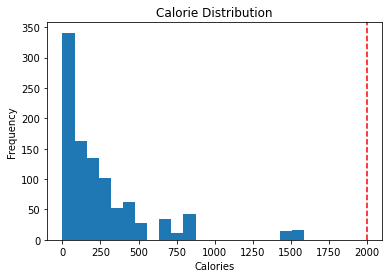

In [55]:
# Create a histogram of the calories column
plt.hist(df['Calories'], bins=20)
plt.axvline(x=2000, color='r', linestyle='--')
plt.title('Calorie Distribution')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

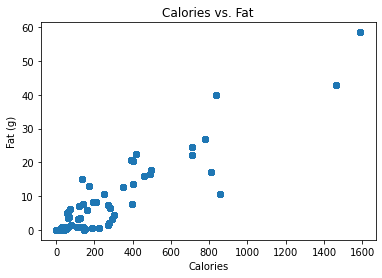

In [54]:
# Create a scatter plot of calories vs. fat
plt.scatter(df['Calories'], df['Fat (g)'])
plt.title('Calories vs. Fat')
plt.xlabel('Calories')
plt.ylabel('Fat (g)')
plt.show()

In [61]:
df_sorted = df.sort_values(by='Fat (g)', ascending=False)
df_sorted.head(20)

,Meal,Time,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note
500,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
333,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
682,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
873,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
564,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
235,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
201,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
691,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
502,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN
137,Breakfast,8:10 PM,1590.0,58.5,21.5,0.0,0.0,0.0,165.0,3265.0,0.0,202.0,38.5,13.5,71.5,129.0,70.0,69.0,67.0,NaN


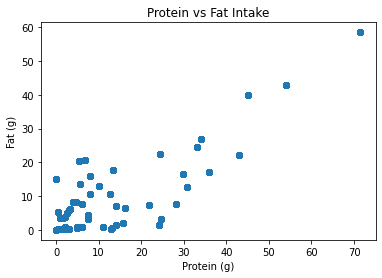

In [74]:
# Select the 'Protein (g)' and 'Fat (g)' columns
df_protein_fat = df[['Protein (g)', 'Fat (g)']]

# Create a scatter plot of 'Protein (g)' vs 'Fat (g)'
plt.scatter(df_protein_fat['Protein (g)'], df_protein_fat['Fat (g)'])
plt.title('Protein vs Fat Intake')
plt.xlabel('Protein (g)')
plt.ylabel('Fat (g)')
plt.show()


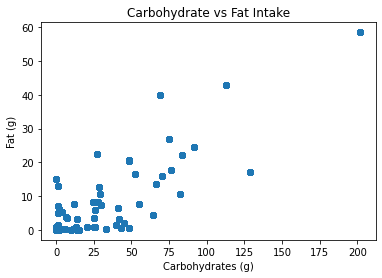

In [73]:
# Select the 'Carbohydrates (g)' and 'Fat (g)' columns
df_carbs_fat = df[['Carbohydrates (g)', 'Fat (g)']]

# Create a scatter plot of 'Carbohydrates (g)' vs 'Fat (g)'
plt.scatter(df_carbs_fat['Carbohydrates (g)'], df_carbs_fat['Fat (g)'])
plt.title('Carbohydrate vs Fat Intake')
plt.xlabel('Carbohydrates (g)')
plt.ylabel('Fat (g)')
plt.show()


In [46]:
# Create three subset dataframes based on the "Meal" column
df_lunch = lunch
df_dinner = dinner
df_breakfast = breakfast
df_snacks = snacks

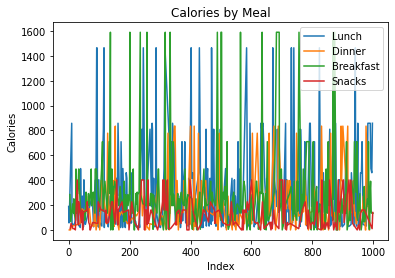

In [47]:
# Plot the line graph for the calories from each subset dataframe
plt.plot(df_lunch['Calories'], label='Lunch')
plt.plot(df_dinner['Calories'], label='Dinner')
plt.plot(df_breakfast['Calories'], label='Breakfast')
plt.plot(df_snacks['Calories'], label='Snacks')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Calories')
plt.title('Calories by Meal')
plt.show()

In [48]:
# Calculate the average calories per meal type
avg_calories = df.groupby('Meal')['Calories'].mean()

# Print the average calories per meal type
print(avg_calories)

Meal
Breakfast    305.463863
Dinner       212.922680
Lunch        327.590291
Snacks       124.062500
Name: Calories, dtype: float64


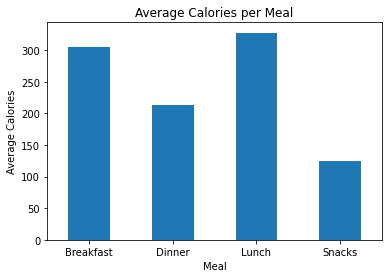

In [49]:
# Plot the bar chart
avg_calories.plot(kind='bar', rot=0)
plt.xlabel('Meal')
plt.ylabel('Average Calories')
plt.title('Average Calories per Meal')
plt.show()

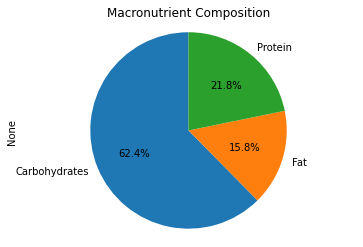

In [51]:
# Calculate the total amount of each macronutrient
total_carbs = df['Carbohydrates (g)'].sum()
total_fat = df['Fat (g)'].sum()
total_protein = df['Protein (g)'].sum()

# Create a pandas Series with the total amount of each macronutrient
nutrients = pd.Series([total_carbs, total_fat, total_protein],
                      index=['Carbohydrates', 'Fat', 'Protein'])

# Plot the pie chart
ax = nutrients.plot(kind='pie', autopct='%1.1f%%', startangle=90)
ax.set_facecolor('w')
plt.axis('equal')
plt.title('Macronutrient Composition')
plt.show()